In [1]:
# Import Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

In [2]:
# Load Data
train = pd.read_csv('../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

In [3]:
# Split the train data to train set and valid set
val_data = train.sample(frac=0.2, random_state=42)
train_data = train.drop(val_data.index)

print(
    "Using %d samples for training and %d for validation"
    % (len(train_data), len(val_data))
)

Using 21964 samples for training and 5491 for validation


In [4]:
# Split data to X and y labels
x_train = train_data.drop('label', axis = 1)
y_train = train_data.pop("label")

x_valid = val_data.drop('label', axis = 1)
y_valid = val_data.pop("label")

x_test = test.drop('label', axis = 1)
y_test = test.pop("label")

In [5]:
# Scale/Normalize the data and Prep for the model
x_train = x_train.values/255
x_valid = x_valid.values/255
x_test = x_test.values/255

y_train = keras.utils.to_categorical(y_train, 26)
y_valid = keras.utils.to_categorical(y_valid, 26)
y_test = keras.utils.to_categorical(y_test, 26)

In [6]:
# Get the shape of the data
x_train.shape, x_valid.shape, x_test.shape, y_train.shape, y_valid.shape, y_test.shape

((21964, 784), (5491, 784), (7172, 784), (21964, 26), (5491, 26), (7172, 26))

In [7]:
# Reshape the X data to fit the model
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train.shape, x_valid.shape, x_test.shape, y_train.shape, y_valid.shape, y_test.shape

((21964, 28, 28, 1),
 (5491, 28, 28, 1),
 (7172, 28, 28, 1),
 (21964, 26),
 (5491, 26),
 (7172, 26))

In [8]:
# Build the model 
model = keras.Sequential([
    keras.layers.Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, 3, padding = 'same', activation = 'relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(26, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

In [9]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr*tf.math.exp(-0.1)

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

callbacks = [keras.callbacks.LearningRateScheduler(scheduler),
             keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=10)
            ]

In [11]:
epochs = 5
batch_size = 64

history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, 
                    validation_data = (x_valid, y_valid), callbacks = [callbacks])

Epoch 1/5
344/344 [==============================] - 23s 65ms/step - loss: 1.2341 - accuracy: 0.6153 - val_loss: 0.2370 - val_accuracy: 0.9224
Epoch 2/5
344/344 [==============================] - 23s 66ms/step - loss: 0.1528 - accuracy: 0.9509 - val_loss: 0.0370 - val_accuracy: 0.9938
Epoch 3/5
344/344 [==============================] - 24s 69ms/step - loss: 0.0449 - accuracy: 0.9869 - val_loss: 0.0147 - val_accuracy: 0.9978
Epoch 4/5
344/344 [==============================] - 23s 67ms/step - loss: 0.0228 - accuracy: 0.9935 - val_loss: 0.0035 - val_accuracy: 0.9998
Epoch 5/5
344/344 [==============================] - 22s 65ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.0048 - val_accuracy: 0.9989


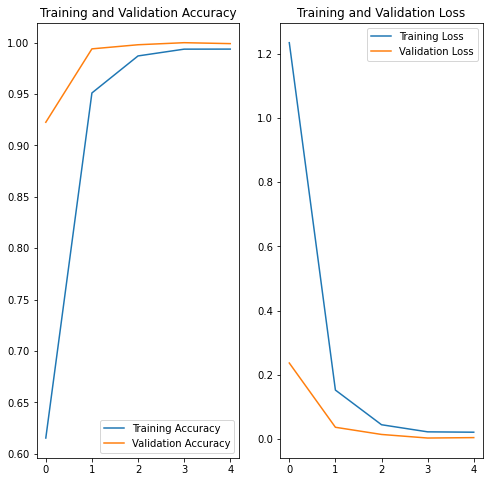

In [12]:
#Plot Losses and Accuracies 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [13]:
# Evaluate the Model
model.evaluate(x_test, y_test)

225/225 [==============================] - 2s 9ms/step - loss: 0.2490 - accuracy: 0.9460


[0.24903275072574615, 0.946040153503418]